In [170]:
import pandas as pd
import csv
import numpy as np
import pandas_datareader.data as web
import datetime
pd.set_option('display.max_columns', 50)

In [171]:
df = pd.read_csv('/Users/ogizelenovic/Downloads/merged_fin_data')
df = df.rename(columns={'log returns_x': 'Log FX Returns', 'log returns_y': 'Log Portfolio Returns'})
vix_df = pd.read_csv('/Users/ogizelenovic/Downloads/vix.csv')
ir_df = pd.read_csv('/Users/ogizelenovic/Downloads/interestrates.csv')
gpr_df = pd.read_csv('/Users/ogizelenovic/Downloads/GPR.csv')

In [172]:
pf = df['Log Portfolio Returns']
rolling_pf = pf.rolling(20).std()
df['Rolling 20 Portfolio STD'] = rolling_pf
df1 = df.copy()
df1 = df1.dropna()

percentile = df1['Rolling 20 Portfolio STD'].quantile(.80)
is_high_vol = df1['Rolling 20 Portfolio STD'] >= percentile

above80 = is_high_vol.rolling(window=5).max()
above80 = above80.shift(5)
Y = above80

In [173]:
vix_df = vix_df.rename(columns={'DATE': 'Date'})

In [174]:
df1 = pd.merge(df1, vix_df, on=['Date'], how='inner')

In [175]:
df1.sort_index(ascending=True, inplace=True)

df1['MA_20'] = df1['close'].rolling(window=20).mean()
df1['MA_50'] = df1['close'].rolling(window=50).mean()

In [176]:
df1['FX_Trend'] = np.where(
    df1['MA_20'] > df1['MA_50'], 
    1,                         
    np.where(                 
        df1['MA_20'] < df1['MA_50'], 
        -1,                      
        0                        
    )
)

In [177]:
df1['Price_Deviation'] = (df1['close'] - df1['MA_50']) / df1['MA_50']

In [178]:
ir_df = ir_df.rename(columns={'DATE': 'Date'})
df1 = pd.merge(df1, ir_df, on=['Date'], how='inner')

In [179]:
df1['Yield Curve Spread'] = df1['10-Year Treasury Constant Maturity Rate'] - df1['3-Month Treasury Constant Maturity Rate']

In [180]:
gpr_df['date'] = pd.to_datetime(gpr_df['date'], dayfirst=True)

/var/folders/ly/dwvwh7vx78722z89t2vvt04m0000gn/T/ipykernel_12259/1359531942.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gpr_df['date'] = pd.to_datetime(gpr_df['date'], dayfirst=True)


In [181]:
gpr_df = gpr_df.drop(['DAY', 'N10D', 'GPRD_MA7', 'event', 'var_name', 'var_label', 'GPRD_MA30'], axis=1)
gpr_df = gpr_df.rename(columns={'GPRD': 'GPR Composite', 'date': 'Date'})

In [183]:
df1['Date']= pd.to_datetime(df1['Date'])
df1 = pd.merge(df1, gpr_df, on=['Date'], how='inner')
df1

,Date,open,high,low,close,prev_adj_close_x,Log FX Returns,Open,High,Low,Close,Volume,prev_adj_close_y,Log Portfolio Returns,Rolling 20 Portfolio STD,VIX,MA_20,MA_50,FX_Trend,Price_Deviation,10-Year Treasury Constant Maturity Rate,3-Month Treasury Constant Maturity Rate,Yield Curve Spread,GPR Composite,GPRD_ACT,GPRD_THREAT
0,2024-12-02,1.05695,1.05742,1.04603,1.04966,1.05073,-0.001019,47.7600,47.9900,47.3600,47.9100,1.646353e+06,48.1500,-0.004997,0.008142,13.34,NaN,NaN,0,NaN,4.19,4.51,-0.32,197.00,320.05,121.34
1,2024-11-29,1.05511,1.05971,1.05411,1.05748,1.04966,0.007422,47.3600,47.8700,47.3300,47.8600,1.569655e+06,47.9100,-0.001044,0.008139,13.51,NaN,NaN,0,NaN,4.18,4.58,-0.40,226.97,293.54,234.64
2,2024-11-27,1.04868,1.05878,1.04740,1.05660,1.05489,0.001620,47.1300,47.3700,47.0500,47.3000,1.726747e+06,47.8600,-0.011770,0.008374,14.10,NaN,NaN,0,NaN,4.25,4.60,-0.35,199.63,236.33,176.37
3,2024-11-26,1.04929,1.05448,1.04246,1.04879,1.05660,-0.007419,47.3650,47.4100,46.8800,47.0400,1.504362e+06,47.3000,-0.005512,0.008390,14.10,NaN,NaN,0,NaN,4.30,4.61,-0.31,169.26,192.84,130.69
4,2024-11-25,1.04829,1.05303,1.04486,1.04942,1.04879,0.000601,47.6000,47.6500,47.2350,47.3800,1.665932e+06,47.0400,0.007202,0.008543,14.60,NaN,NaN,0,NaN,4.27,4.62,-0.35,123.71,164.43,91.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,2010-01-08,1.43070,1.44390,1.42640,1.44070,1.45160,-0.007537,28.3783,28.6873,28.3725,28.6736,3.155769e+05,28.8564,-0.006355,0.019615,18.13,1.413340,1.383550,1,0.041307,3.83,0.05,3.78,110.30,117.29,110.06
3748,2010-01-07,1.44080,1.44470,1.42990,1.43100,1.44070,-0.006756,28.3119,28.4311,28.2102,28.4311,6.674905e+05,28.6736,-0.008493,0.019995,19.06,1.416500,1.385038,1,0.033185,3.85,0.05,3.80,102.26,116.51,91.11
3749,2010-01-06,1.43650,1.44350,1.42830,1.44110,1.43100,0.007033,28.4233,28.6003,28.3490,28.5651,3.853082e+05,28.4311,0.004702,0.019830,19.16,1.419925,1.386802,1,0.039153,3.85,0.06,3.79,161.59,177.20,161.24
3750,2010-01-05,1.44120,1.44840,1.43460,1.43630,1.44110,-0.003336,28.5181,28.6218,28.3285,28.4448,1.223824e+06,28.5651,-0.004220,0.016658,19.35,1.422265,1.388320,1,0.034560,3.77,0.07,3.70,122.53,148.32,123.72


--- Step 1: Initial Data Preparation ---
DataFrame is sorted by date and index is set.

--- Step 2: Engineering the Target Variable (Y_target) ---
'Y_target' column created.

--- Step 3: Final Cleaning ---
Forward-filled NaN values in feature columns.
Dropped 5 rows containing NaNs.

--- Step 3a: Final Data Type Conversion ---
Checking and converting data types for feature columns...
Column 'GPR Composite' has non-numeric dtype (object). Converting...
Column 'GPRD_ACT' has non-numeric dtype (object). Converting...
Column 'GPRD_THREAT' is already numeric.

Verifying dtypes of feature columns after conversion:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3672 entries, 2010-01-04 to 2024-09-16
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rolling 20 Portfolio STD  3672 non-null   float64
 1   VIX                       3672 non-null   float64
 2   Yield Curve Spread        3672 non-

/var/folders/ly/dwvwh7vx78722z89t2vvt04m0000gn/T/ipykernel_12259/2214597467.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[features_to_use] = df1[features_to_use].fillna(method='ffill')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


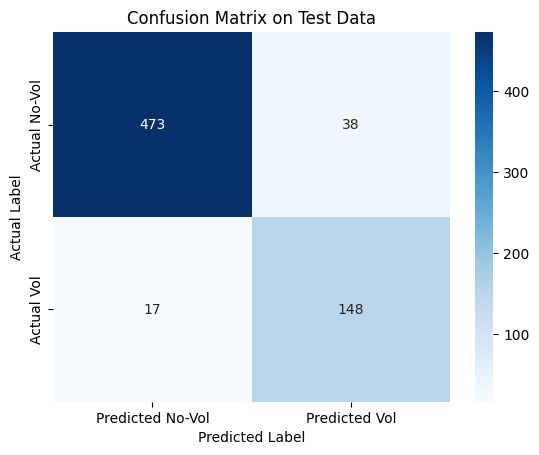


Classification Report (Test Set):
                         precision    recall  f1-score   support

No-Volatility Event (0)       0.97      0.93      0.95       511
   Volatility Event (1)       0.80      0.90      0.84       165

               accuracy                           0.92       676
              macro avg       0.88      0.91      0.89       676
           weighted avg       0.92      0.92      0.92       676


Feature Importances:
                    feature  importance
0  Rolling 20 Portfolio STD    0.842161
2        Yield Curve Spread    0.048631
1                       VIX    0.030151
4                  GPRD_ACT    0.027224
3             GPR Composite    0.026785
5               GPRD_THREAT    0.025048


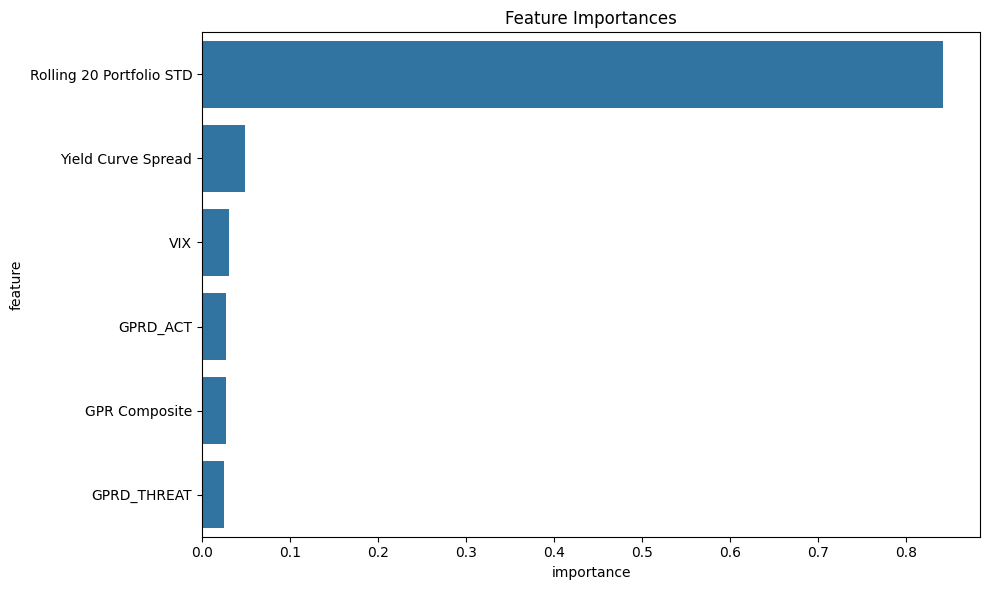

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("--- Step 1: Initial Data Preparation ---")

if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index('Date', inplace=True)
elif not isinstance(df1.index, pd.DatetimeIndex):
    df1.index = pd.to_datetime(df1.index)

df1.sort_index(inplace=True)
print("DataFrame is sorted by date and index is set.")

h = 5 
volatility_threshold = df1['Rolling 20 Portfolio STD'].quantile(0.80)

is_high_vol = df1['Rolling 20 Portfolio STD'] > volatility_threshold

event_in_window = is_high_vol.rolling(window=h).max()

Y_target = event_in_window.shift(-h)

df1['Y_target'] = Y_target
print("'Y_target' column created.")

feature_cols_to_fill = ['VIX', 'Yield Curve Spread', 'GPR Composite', 'GPRD_ACT', 'GPRD_THREAT']
features_to_use = [f for f in feature_cols_to_fill if f in df1.columns]
df1[features_to_use] = df1[features_to_use].fillna(method='ffill')
print("Forward-filled NaN values in feature columns.")

initial_rows = len(df1)
df1.dropna(inplace=True)
final_rows = len(df1)
print(f"Dropped {initial_rows - final_rows} rows containing NaNs.")

df1['Y_target'] = df1['Y_target'].astype(int)

columns_to_convert = ['GPR Composite', 'GPRD_ACT', 'GPRD_THREAT']

print("Checking and converting data types for feature columns...")
for col in columns_to_convert:
    if col in df1.columns:
        if pd.api.types.is_numeric_dtype(df1[col]):
            print(f"Column '{col}' is already numeric.")
        else:
            print(f"Column '{col}' has non-numeric dtype ({df1[col].dtype}). Converting...")
            df1[col] = pd.to_numeric(df1[col], errors='coerce')

df1.dropna(inplace=True)

print("\nVerifying dtypes of feature columns after conversion:")
features_to_check = [f for f in all_features if f in df1.columns]
print(df1[features_to_check].info())

y = df1['Y_target']
all_features = [
    'Rolling 20 Portfolio STD',
    'VIX',
    'Yield Curve Spread',
    'GPR Composite',
    'GPRD_ACT',
    'GPRD_THREAT'
]

X = df1[[f for f in all_features if f in df1.columns]]
print(f"Using {X.shape[1]} features: {X.columns.tolist()}")
print(f"Target variable distribution (1 = High-Vol Event):\n{y.value_counts(normalize=True)}")

split_date = '2022-01-01'
X_train = X.loc[X.index < split_date]
X_test = X.loc[X.index >= split_date]
y_train = y.loc[y.index < split_date]
y_test = y.loc[y.index >= split_date]

print(f"Training data from {X_train.index.min().date()} to {X_train.index.max().date()} ({len(X_train)} samples)")
print(f"Testing data from {X_test.index.min().date()} to {X_test.index.max().date()} ({len(X_test)} samples)")

if y_train.value_counts().get(1, 0) > 0:
    scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]
else:
    scale_pos_weight_value = 1

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    use_label_encoder=False,
    random_state=42
)

print(y_train.value_counts())

print(y_test.value_counts())

print(df1['Y_target'].value_counts())

model.fit(X_train, y_train, verbose=False)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No-Vol', 'Predicted Vol'], yticklabels=['Actual No-Vol', 'Actual Vol'])
plt.title('Confusion Matrix on Test Data')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=['No-Volatility Event (0)', 'Volatility Event (1)']))

print("\nFeature Importances:")
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [185]:
df1

,open,high,low,close,prev_adj_close_x,Log FX Returns,Open,High,Low,Close,Volume,prev_adj_close_y,Log Portfolio Returns,Rolling 20 Portfolio STD,VIX,MA_20,MA_50,FX_Trend,Price_Deviation,10-Year Treasury Constant Maturity Rate,3-Month Treasury Constant Maturity Rate,Yield Curve Spread,GPR Composite,GPRD_ACT,GPRD_THREAT,Y_target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1.43220,1.44560,1.42580,1.44100,1.43630,0.003267,28.3832,28.5553,28.1799,28.3568,2.000632e+06,28.4448,-0.003099,0.016363,20.04,1.424505,1.389670,1,0.036937,3.85,0.08,3.77,177.12,190.89,214.95,1
2010-01-05,1.44120,1.44840,1.43460,1.43630,1.44110,-0.003336,28.5181,28.6218,28.3285,28.4448,1.223824e+06,28.5651,-0.004220,0.016658,19.35,1.422265,1.388320,1,0.034560,3.77,0.07,3.70,122.53,148.32,123.72,1
2010-01-06,1.43650,1.44350,1.42830,1.44110,1.43100,0.007033,28.4233,28.6003,28.3490,28.5651,3.853082e+05,28.4311,0.004702,0.019830,19.16,1.419925,1.386802,1,0.039153,3.85,0.06,3.79,161.59,177.20,161.24,1
2010-01-07,1.44080,1.44470,1.42990,1.43100,1.44070,-0.006756,28.3119,28.4311,28.2102,28.4311,6.674905e+05,28.6736,-0.008493,0.019995,19.06,1.416500,1.385038,1,0.033185,3.85,0.05,3.80,102.26,116.51,91.11,1
2010-01-08,1.43070,1.44390,1.42640,1.44070,1.45160,-0.007537,28.3783,28.6873,28.3725,28.6736,3.155769e+05,28.8564,-0.006355,0.019615,18.13,1.413340,1.383550,1,0.041307,3.83,0.05,3.78,110.30,117.29,110.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-17,1.11302,1.11461,1.11106,1.11127,1.11156,-0.000261,50.9600,50.9700,50.5800,50.7500,1.037952e+06,50.6000,0.002960,0.011847,17.61,1.106164,1.085967,1,0.023300,3.65,4.95,-1.30,100.79,80.38,111.74,0
2024-09-18,1.11130,1.11891,1.10965,1.11156,1.11613,-0.004103,50.8300,51.3075,50.5150,50.6000,6.715010e+05,51.7100,-0.021700,0.011835,18.23,1.105060,1.084717,1,0.024747,3.70,4.84,-1.14,122.01,145.96,101.46,0
2024-09-19,1.11156,1.11790,1.10681,1.11613,1.11617,-0.000036,51.4900,51.8400,51.2600,51.7100,1.433008e+06,50.9800,0.014218,0.010671,16.33,1.103796,1.083618,1,0.030003,3.73,4.80,-1.07,93.75,137.08,62.37,0


--- Step 1: Initial Data Preparation ---
DataFrame index is set to 'Date' and sorted.

--- Step 2: Engineering Base Features and Target Variable ---

--- Step 3: Creating the Lagged Feature for Robustness Test ---
Created new lagged feature: 'Rolling 20 Portfolio STD_lag_5'

--- Step 4: Final Cleaning and Type Conversion ---
Dropped 29 rows containing NaNs. Final usable rows: 3643

--- Step 5: Defining Feature Set for Lagged Model ---
Using lagged feature set with 6 features: ['Rolling 20 Portfolio STD_lag_5', 'VIX', 'Yield Curve Spread', 'GPR Composite', 'GPRD_ACT', 'GPRD_THREAT']
Target distribution for modeling:
Y_target
0    0.767499
1    0.232501
Name: proportion, dtype: float64

--- Step 6: Performing Chronological Train-Test Split ---
Training data from 2010-02-08 to 2021-12-31
Testing data from 2022-01-03 to 2024-09-09

--- Step 7: Training the XGBoost Model with Lagged Features ---
Model training complete.

--- Model Evaluation (Lagged Features) on Test Data ---


/var/folders/ly/dwvwh7vx78722z89t2vvt04m0000gn/T/ipykernel_12259/1029908141.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[features_present] = df1[features_present].fillna(method='ffill')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:59:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


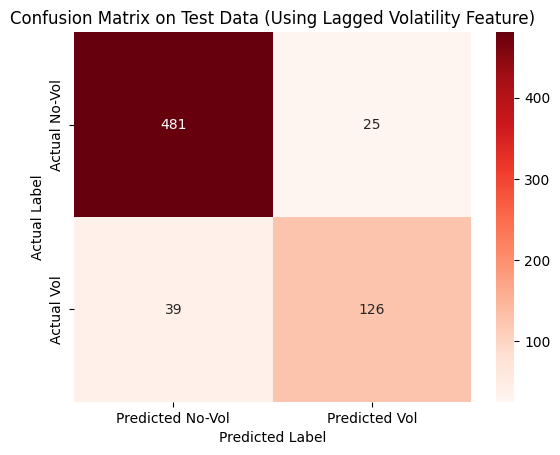


Classification Report (Lagged Features Test Set):
                         precision    recall  f1-score   support

No-Volatility Event (0)       0.93      0.95      0.94       506
   Volatility Event (1)       0.83      0.76      0.80       165

               accuracy                           0.90       671
              macro avg       0.88      0.86      0.87       671
           weighted avg       0.90      0.90      0.90       671


Feature Importances (Lagged Model):
                          feature  importance
0  Rolling 20 Portfolio STD_lag_5    0.695146
1                             VIX    0.105281
2              Yield Curve Spread    0.089367
5                     GPRD_THREAT    0.040956
4                        GPRD_ACT    0.038006
3                   GPR Composite    0.031245


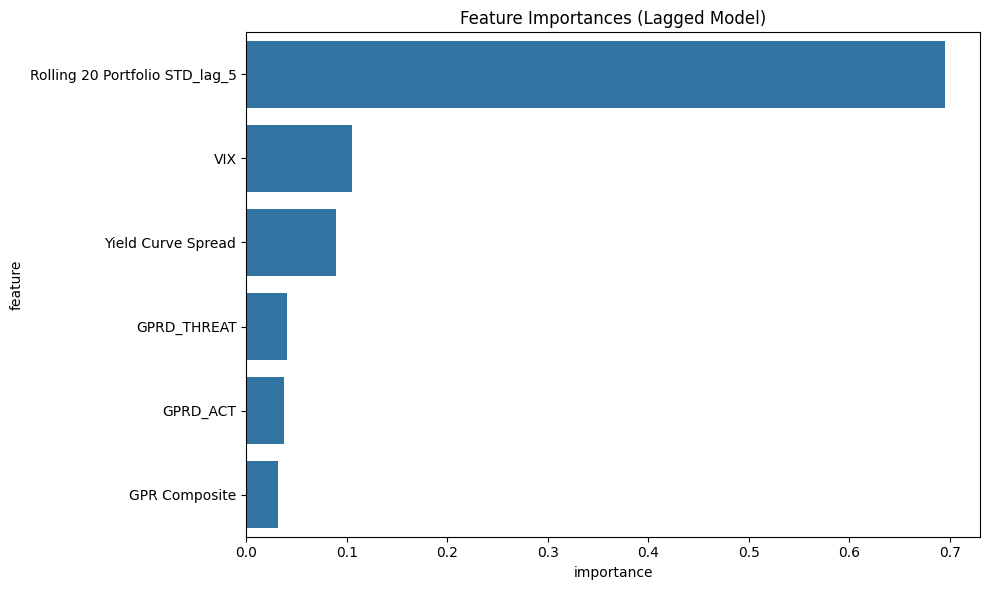

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index('Date', inplace=True)
elif not isinstance(df1.index, pd.DatetimeIndex):
    df1.index = pd.to_datetime(df1.index)
df1.sort_index(inplace=True)
print("DataFrame index is set to 'Date' and sorted.")

df1['Rolling 20 Portfolio STD'] = df1['Log Portfolio Returns'].rolling(20).std()

h = 5
vol_threshold = df1['Rolling 20 Portfolio STD'].quantile(0.80)
is_high_vol = df1['Rolling 20 Portfolio STD'] > vol_threshold
event_in_window = is_high_vol.rolling(window=h).max()
df1['Y_target'] = event_in_window.shift(-h)

feature_to_lag = 'Rolling 20 Portfolio STD'
lag_period = 5 
lagged_feature_name = f'{feature_to_lag}_lag_{lag_period}'
df1[lagged_feature_name] = df1[feature_to_lag].shift(lag_period)
print(f"Created new lagged feature: '{lagged_feature_name}'")

feature_cols_to_fill = ['VIX', 'Yield Curve Spread', 'GPR Composite', 'GPRD_ACT', 'GPRD_THREAT']
features_present = [f for f in feature_cols_to_fill if f in df1.columns]
df1[features_present] = df1[features_present].fillna(method='ffill')

gpr_columns = ['GPR Composite', 'GPRD_ACT', 'GPRD_THREAT']
for col in gpr_columns:
    if col in df1.columns and not pd.api.types.is_numeric_dtype(df1[col]):
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

initial_rows = len(df1)
df1.dropna(inplace=True)
final_rows = len(df1)
print(f"Dropped {initial_rows - final_rows} rows containing NaNs. Final usable rows: {final_rows}")

df1['Y_target'] = df1['Y_target'].astype(int)

y = df1['Y_target']

lagged_features = [
    lagged_feature_name,
    'VIX',
    'Yield Curve Spread',
    'GPR Composite',
    'GPRD_ACT',
    'GPRD_THREAT'
]
X_lagged = df1[[f for f in lagged_features if f in df1.columns]]
print(f"Using lagged feature set with {X_lagged.shape[1]} features: {X_lagged.columns.tolist()}")
print(f"Target distribution for modeling:\n{y.value_counts(normalize=True)}")

split_date = '2022-01-01'
X_train_lagged = X_lagged.loc[X_lagged.index < split_date]
X_test_lagged = X_lagged.loc[X_lagged.index >= split_date]

y_train = y.loc[y.index < split_date]
y_test = y.loc[y.index >= split_date]

print(f"Training data from {X_train_lagged.index.min().date()} to {X_train_lagged.index.max().date()}")
print(f"Testing data from {X_test_lagged.index.min().date()} to {X_test_lagged.index.max().date()}")

if y_train.value_counts().get(1, 0) > 0:
    scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]
else:
    scale_pos_weight_value = 1

model_lagged = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    use_label_encoder=False,
    random_state=42
)

model_lagged.fit(X_train_lagged, y_train, verbose=False)
print("Model training complete.")

y_pred_lagged = model_lagged.predict(X_test_lagged)

cm_lagged = confusion_matrix(y_test, y_pred_lagged)
sns.heatmap(cm_lagged, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted No-Vol', 'Predicted Vol'], yticklabels=['Actual No-Vol', 'Actual Vol'])
plt.title('Confusion Matrix on Test Data (Using Lagged Volatility Feature)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report (Lagged Features Test Set):")
print(classification_report(y_test, y_pred_lagged, target_names=['No-Volatility Event (0)', 'Volatility Event (1)']))
    
print("\nFeature Importances (Lagged Model):")
feature_importances_lagged = pd.DataFrame({'feature': X_lagged.columns, 'importance': model_lagged.feature_importances_})
feature_importances_lagged = feature_importances_lagged.sort_values('importance', ascending=False)
print(feature_importances_lagged)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_lagged)
plt.title('Feature Importances (Lagged Model)')
plt.tight_layout()
plt.show()

In [ ]:
import joblib


print("--- Saving required outputs for the final simulation ---")

model_to_save = model_lagged

model_filename = '/Users/ogizelenovic/Downloads/xgboost_volatility_model.joblib'
joblib.dump(model_to_save, model_filename)

print(f"\nSuccessfully saved the trained XGBoost model to:")
print(model_filename)

features_to_save = X_test_lagged 

test_features_filename = '/Users/ogizelenovic/Downloads/xtest_features.csv'
features_to_save.to_csv(test_features_filename)

print(f"\nSuccessfully saved the test set features to:")
print(test_features_filename)

print("\n--> You are now ready to run the final simulation notebook.")